<p align="center">
  <img src="assets/wine_quality.jpg" alt="wine quality">
</p>

# Wine quality prediction through Machine Learning

---

Welcome to this new data analysis. In this notebook, we are going to explore a well-known dataset in the Data Science community: the wine quality dataset. This dataset contains a number of chemical characteristics of different wines, along with a quality rating for each.

The goal of our analysis is to develop a Machine Learning model that can predict wine quality based on these characteristics. These types of models can be extremely useful in the wine industry, allowing producers to predict and optimize the quality of their products.

Throughout this notebook, we will attempt to perform an exploratory analysis of the data, prepare the data for modeling, train several Machine Learning models and evaluate their performance. 

We hope you find this analysis interesting and useful - let's get started!

## Importing libraries and datasets 

Next, we will import all the libraries needed for our analysis and modeling:

- `numpy`: Provides us with a variety of routines for fast matrix and mathematical operations.
- `pandas`: Provides high-performance, easy-to-use data structures and analysis tools.
- `matplotlib` and `seaborn`: will be used to visualize the data. They will help us to better understand the characteristics and distribution of the data.
- `sklearn`: It is a module with several libraries installed, we will be interested in working with various models and means of evaluation.
- `XGBoost`: It is an optimized gradient boosting library. We will use its classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


Now that we have imported the necessary libraries, the next step is to import our dataset.

In [2]:
df = pd.read_csv('data/winequalityN.csv')

## Initial exploration of the data

Once we have imported the dataset, we can take a look at the first few rows to get an idea of the information it contains.

In [3]:
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

As we can see, each row represents a different wine, and the columns represent the characteristics of that wine, including its type (white or red), various chemical attributes, and a quality rating:

1. `type`: Refers to the type of wine. In our dataset, all 6497 wines have a specified type (white or red).
2. `fixed acidity`: Refers to acids that do not evaporate easily.
3. `volatile acidity`: This is a measure of the amount of volatile or gaseous acids in the wine.
4. `citric acid`: One of the main acids present in grapes.
5. `residual sugar`: Refers to the amount of sugar remaining after fermentation has finished. 
6. `chlorides`: The amount of salt in the wine.
7. `free sulfur dioxide`: Sulfur dioxide is used in winemaking to prevent the growth of microorganisms and oxidation of the wine.
total sulfur dioxide: The sum of free sulfur dioxide and bound sulfur dioxide.
9. `density`: A measure of the amount of mass per unit volume in the wine.
10. `pH`: A measure of the acidity or alkalinity of the wine.
11. `sulphates`: Sulfates in wine can contribute to sulfur dioxide levels.
12. `alcohol`: The alcoholic volume content of wine.
13. `quality`: A measure of the quality of the wine, to be rated with a score from 1 to 9.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The `describe()` method provides us with a statistical overview that allows us to make some initial observations:

1. As for `fixed acidity`, most wines are between 6.4 and 7.7 g/dm³. However, there are some that reach up to 15.9 g/dm³, which indicates a rather high acidity.
2. The average `volatile acidity` is 0.34 g/dm³, but there are wines that reach up to 1.58 g/dm³. This could suggest a strongly vinegary flavor in some cases.
3. Regarding `citric acid`, most wines have a content ranging from 0.25 to 0.39 g/dm³, although some reach 1.66 g/dm³.
4. Some wines have a fairly high `residual sugar`, reaching up to 65.8 g/dm³, which could translate into very sweet flavors.
5. Regarding `chlorides`, most wines have a content between 0.038 and 0.065 g/dm³. However, there are wines with up to 0.611 g/dm³, which could result in salty flavors.
6. Some wines show a `free sulfur dioxide` of up to 289 mg/dm³, which could indicate better preservation and longer shelf life.
7. As for `total sulfur dioxide`, there are wines reaching up to 440 mg/dm³, which could also suggest better conservation and longer shelf life.
8. Most wines have a `density` between 0.9923 and 0.9970 g/cm³, but some go up to 1.039 g/cm³.
9. In terms of `pH`, most wines are between 3.11 and 3.32. However, some reach a pH of up to 4.01, which could indicate a more bitter taste.
10. We have wines with a `sulfate` content of up to 2.00 g/dm³, which could indicate better conservation and longer shelf life.
11. Most wines have an `alcohol` content between 9.5% and 11.3%, but some wines reach up to 14.9%.
12. In terms of `quality`, the wines in this data set range from 3 to 9, with a mean of 5.8 and a median of 6. This suggests that most of the wines are of medium to good quality.

## Data preparation

In this section, we will focus on preparing our data for analysis and modeling. 

Data preparation is a crucial step. It includes cleaning the data, dealing with missing values, converting categorical variables into a format that ML models can understand, and sometimes creating new variables from existing ones. This process can have a major impact on the quality of the final results, as the models depend heavily on the quality of the input data.

### - Data preprocessing

We will work with `LabelEncoder` to convert `type` categorical labels into a numerical form interpretable by the model.

In [6]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

### - Treatment of null values

We will now proceed to identify and properly treat null or missing values.

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

A common strategy used is to replace the null values with the mean of the non-null values in the same column. However, this strategy may not be ideal if the data is skewed or if there are outliers, as these may distort the mean.

Therefore, in this case, I am considering using the k-Nearest Neighbors (k-NN) method to impute the null values. 

The k-NN method identifies the 'k' data points closest to the observation with the null value and uses these data points to impute the value. The advantage of using k-NN over the mean is that it can capture more complex patterns in the data, which can result in more accurate imputation.

In [8]:
imputer = KNNImputer(n_neighbors=5)

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Graphing the data

We are now going to visualize our data to get a better understanding of the characteristics and their relationship to our target variable, which is `quality`.

Wine quality is our main concern in this analysis, as we are interested in predicting how different chemical characteristics of the wine may influence its quality. By focusing on this characteristic, we can identify which factors contribute most to a high quality wine and use this information to improve wine production in the future.

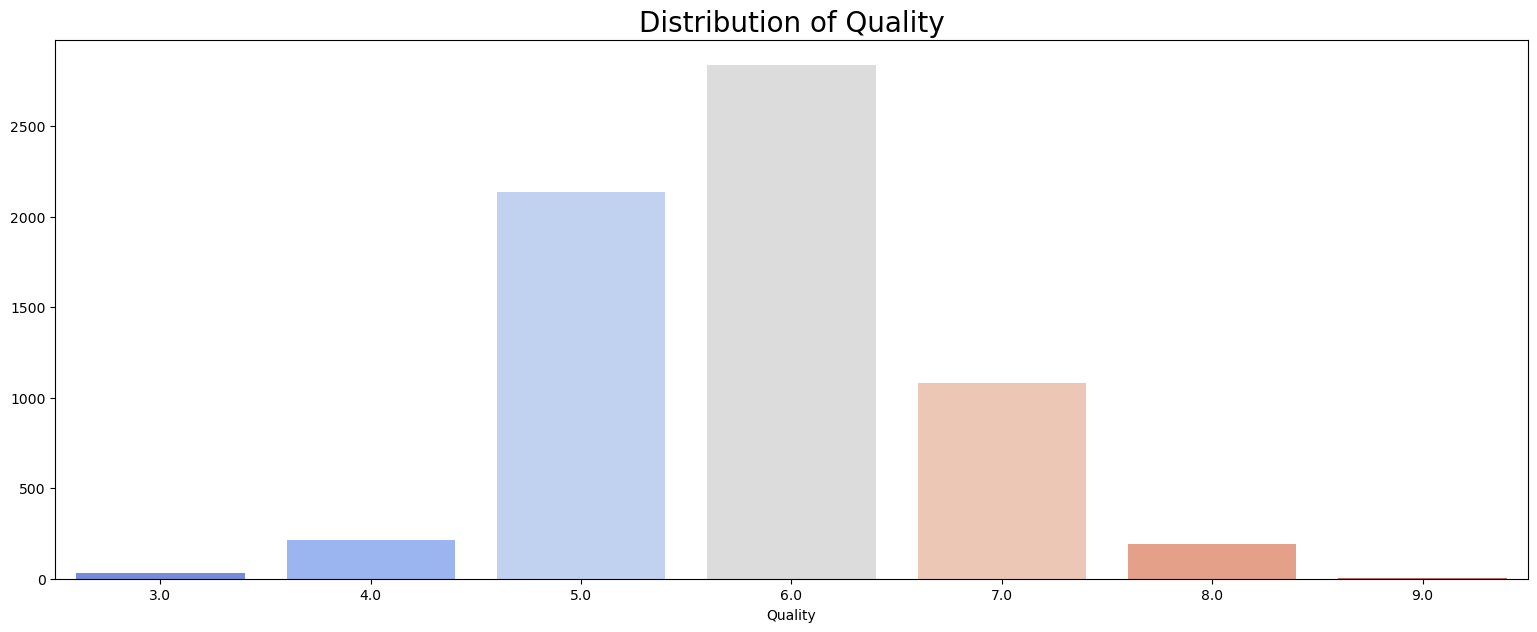

In [9]:
plt.figure(figsize=(19, 7))

sns.countplot(x='quality', data=df, palette='coolwarm')
plt.xlabel('Quality')
plt.ylabel('')
plt.title('Distribution of Quality' , fontsize=20)

plt.show()

**Distribution of Quality**.

Most of the wines in the sample have a quality rating between 5 and 6, with 6 being the most common. Therefore, we could say that the quality of the wines is normal, leaning towards good.

On the other hand, the data show us that very few wines are able to achieve the highest rating. This could indicate that obtaining a higher quality rating requires exceptional conditions.

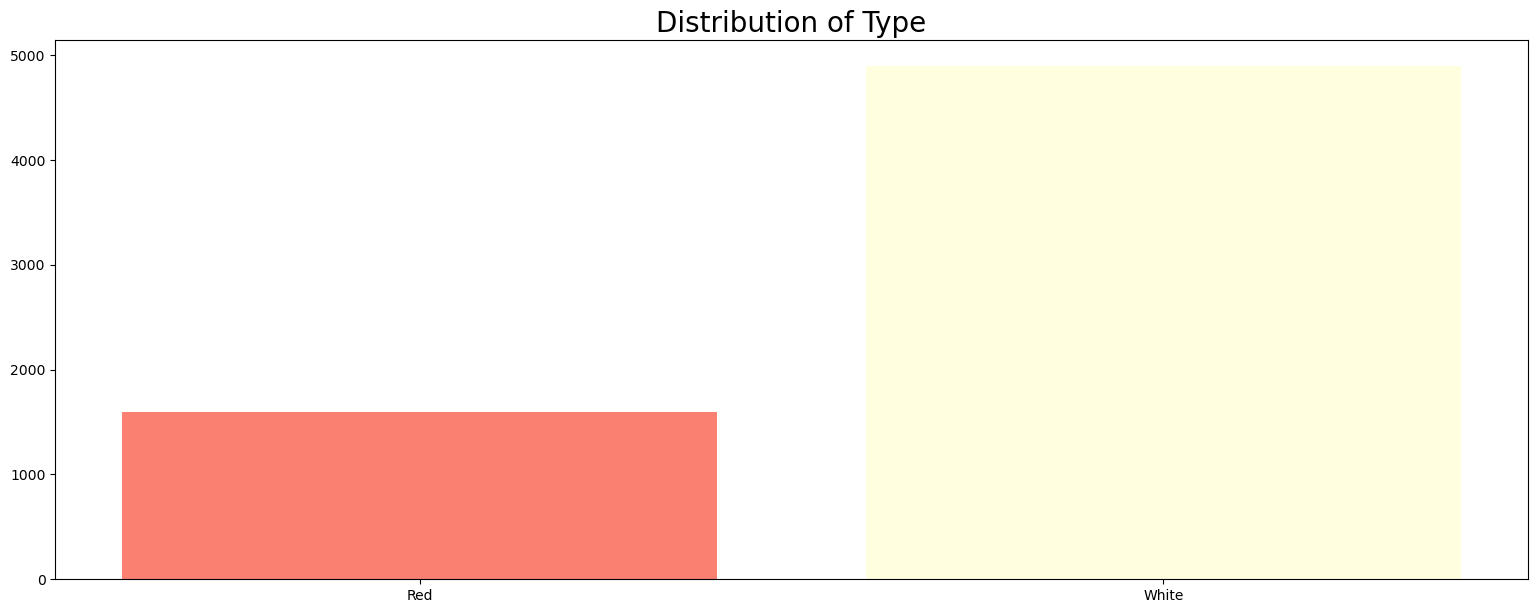

In [10]:
type_sum = df['type'].value_counts()

plt.figure(figsize=(19, 7))

plt.bar(type_sum.index, type_sum.values, color=['lightyellow', 'salmon'])
plt.xticks(type_sum.index, ['White', 'Red'])
plt.title('Distribution of Type' , fontsize=20)

plt.show()

**Distribution of Type of wine**.

In this bar chart, we can see that the vast majority of the wines in the data set are white wines.

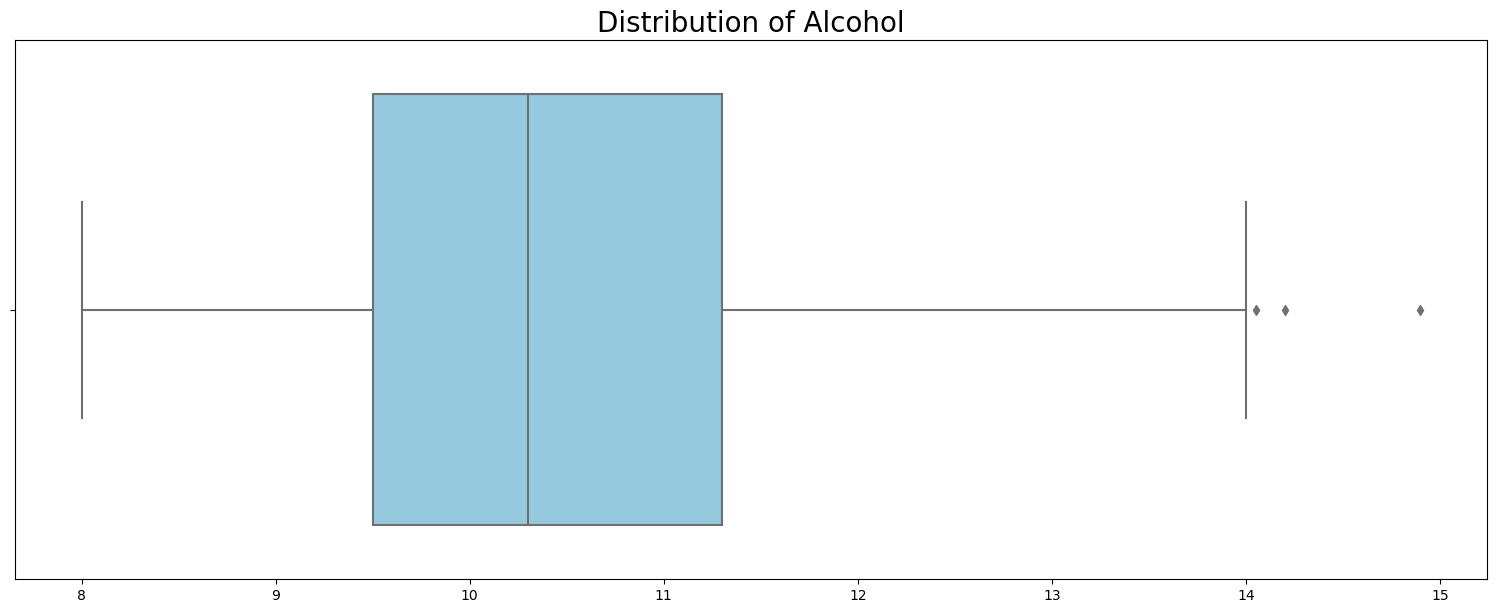

In [11]:
plt.figure(figsize=(19, 7))

sns.boxplot(x=df['alcohol'], color='skyblue')
plt.title('Distribution of Alcohol', fontsize=20)
plt.xlabel('')

plt.show()

**Distribution of Alcohol**.

We can observe that most of the wines have an alcohol volume of around 10%, although we can also observe some out-of-range data with much higher alcohol volumes.

In [12]:
corr = df.corr()
corr

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.487335,-0.652704,0.187418,0.349100,-0.512591,0.471644,0.700357,-0.390645,-0.328700,-0.487137,0.032970,0.119323
fixed acidity,-0.487335,1.000000,0.220327,0.323095,-0.112560,0.298228,-0.283425,-0.329770,0.458927,-0.251581,0.299817,-0.095572,-0.077063
volatile acidity,-0.652704,0.220327,1.000000,-0.378097,-0.196714,0.377095,-0.352873,-0.414744,0.271215,0.260875,0.225560,-0.038108,-0.265762
citric acid,0.187418,0.323095,-0.378097,1.000000,0.142636,0.039113,0.133286,0.195378,0.096266,-0.329012,0.056436,-0.010597,0.085565
residual sugar,0.349100,-0.112560,-0.196714,0.142636,1.000000,-0.129024,0.403654,0.495907,0.552309,-0.267287,-0.185841,-0.359853,-0.036578
chlorides,-0.512591,0.298228,0.377095,0.039113,-0.129024,1.000000,-0.194740,-0.279413,0.362497,0.045079,0.395214,-0.256749,-0.200604
free sulfur dioxide,0.471644,-0.283425,-0.352873,0.133286,0.403654,-0.194740,1.000000,0.720934,0.025717,-0.145308,-0.188381,-0.179838,0.055463
total sulfur dioxide,0.700357,-0.329770,-0.414744,0.195378,0.495907,-0.279413,0.720934,1.000000,0.032395,-0.237812,-0.275648,-0.265740,-0.041385
density,-0.390645,0.458927,0.271215,0.096266,0.552309,0.362497,0.025717,0.032395,1.000000,0.011373,0.259424,-0.686745,-0.305858
pH,-0.328700,-0.251581,0.260875,-0.329012,-0.267287,0.045079,-0.145308,-0.237812,0.011373,1.000000,0.191805,0.121277,0.019817


**Correlation matrix**

Now we will use a correlation matrix, its use will help us to understand the relationships between different characteristics. 

- `Total sulfur dioxide`: Although this variable has a strong correlation with the type of wine, its correlation with the quality of the wine is -0.04. This indicates that total sulfur dioxide does not have a significant impact on wine quality.
- `Chlorides`: Chlorides have a negative correlation with quality of -0.20. This suggests that higher levels of chlorides may be associated with lower wine quality.
- `sulphates`: Sulfates have a low correlation with wine quality, 0.04. Although the correlation is low, sulfates could have some impact on wine quality.
- `Alcohol`: Alcohol has a moderate correlation with wine quality, 0.44, suggesting that wines with higher alcohol content tend to have higher quality.
- `Volatile acidity`: Volatile acidity has a negative correlation with wine quality (-0.27). This suggests that wines with higher volatile acidity tend to have lower quality.

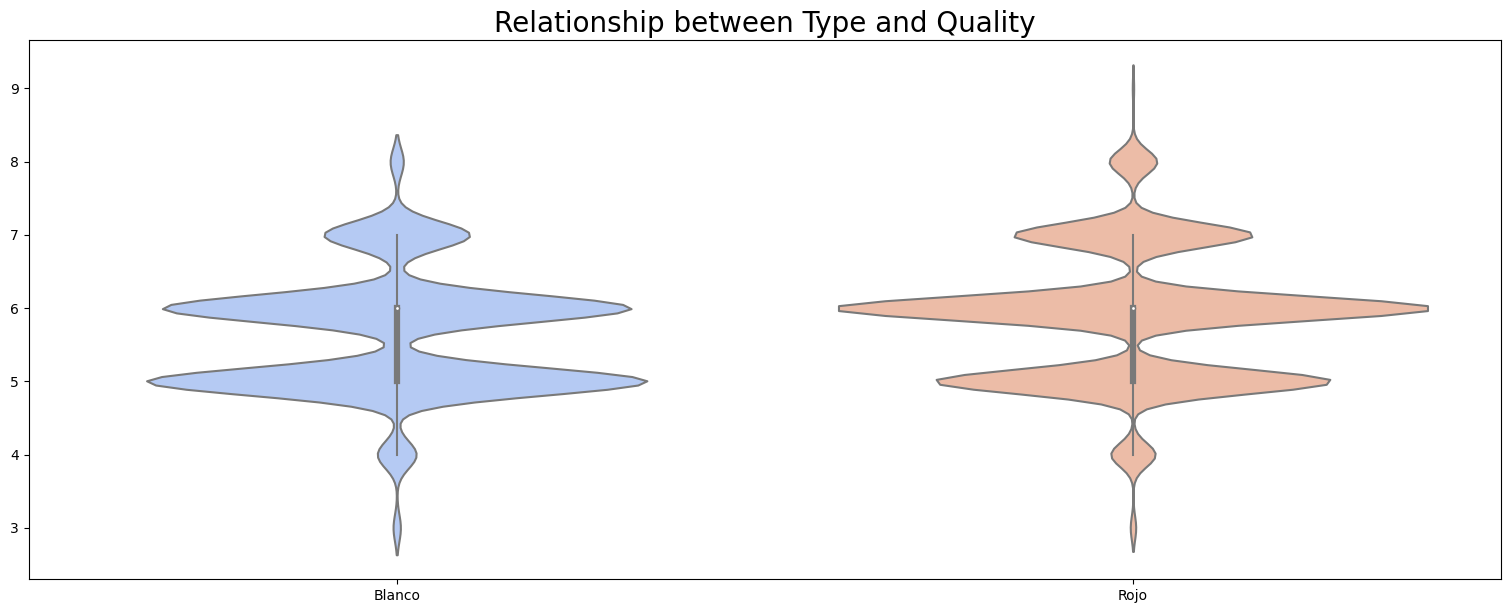

In [13]:
plt.figure(figsize=(19, 7))

sns.violinplot(x='type', y='quality', data=df, palette='coolwarm', split=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Relationship between Type and Quality', fontsize=20)
plt.xticks([0, 1], ['Blanco', 'Rojo'])

plt.show()


**Relationship between Type and Quality**.

The graph shows us that:

1. The volume of low ratings is fairly even for both types of wine.
2. There are more white wines rated with a quality of 6 and more red wines rated with a quality of 5.
3. It is observed that white wines achieve better ratings.

Therefore, we could determine that the production of white wine is somewhat superior in terms of quality.

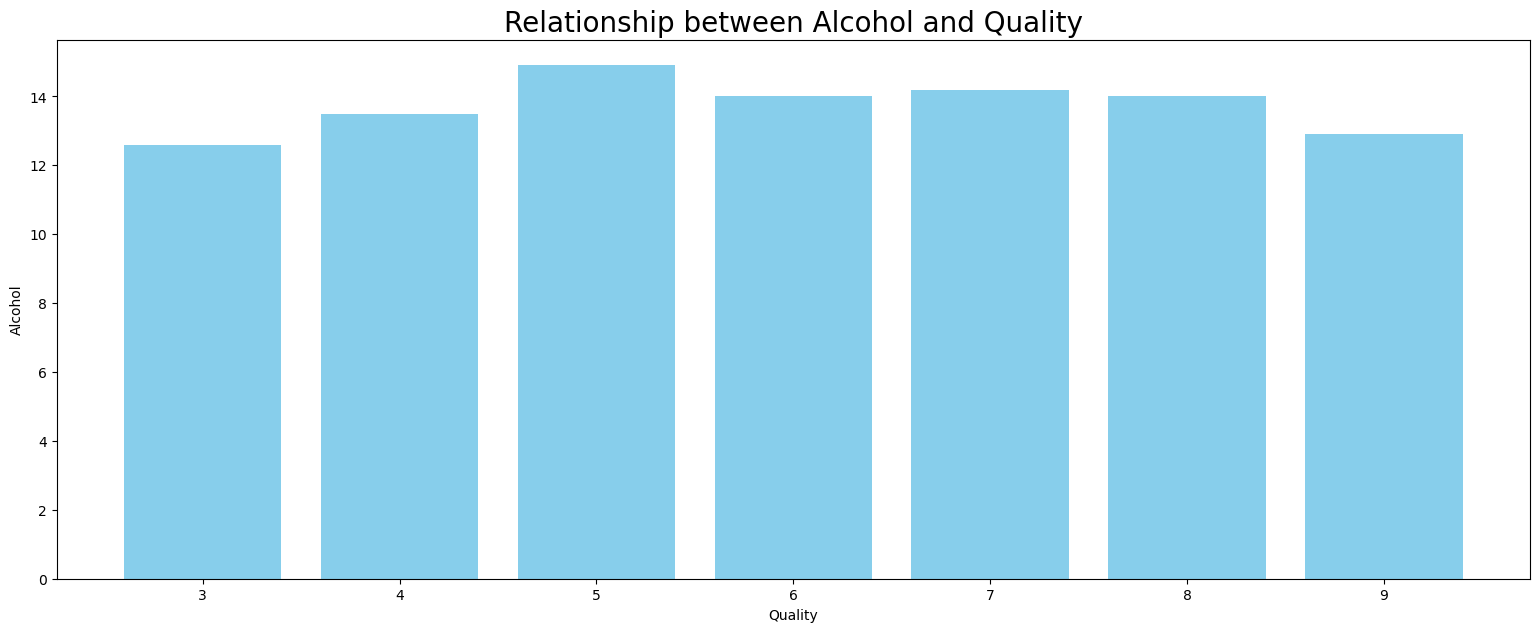

In [14]:
plt.figure(figsize=(19, 7))

plt.bar(df['quality'], df['alcohol'], color='skyblue')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Relationship between Alcohol and Quality', fontsize=20)

plt.show()

**Relationship between Alcohol and Quality**.

Based on the graph, there seems to be a general trend that wines with higher alcohol content have a higher quality rating. Although there is also a trend of some wines with relatively low alcohol content still receiving higher ratings. This data reveals that the majority of medium quality wines have a high alcohol volume and suggests the possible existence of other factors at play that may compensate for lower alcohol content among the higher ratings, such as flavor balance, complexity, among others. 

## Data modeling

Next we will perform our Machine Learning experiment. We will build several predictive models that can infer wine quality based on wine characteristics. 

To achieve this, we will use three machine learning algorithms: Logistic Regression, XGB Classifier and SVC (Support Vector Classifier).

After training our models, we will test their inference, i.e. how they predict wine quality based on the given characteristics. This will allow us to evaluate the accuracy of our models and their usefulness in predicting wine quality.

Comenzaremos filtrando y creando una nueva característica para los vinos de calidad media a alta, la cual utilizaremos en nuestro experimento

In [15]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

We separate the data set for training and prediction, and take the opportunity to separate the key characteristic and the target variable.

In [46]:
features = df.drop([ 'quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=20)

print(f'Conjunto de entrenamiento: ',xtrain.shape, '\nConjunto de prueba: ', xtest.shape)

Conjunto de entrenamiento:  (5197, 12) 
Conjunto de prueba:  (1300, 12)


Next, we call the MinMaxSclaer object and apply it on our training and test sets.

In [47]:
norm = MinMaxScaler()

xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

### - Logistic Regression

It is a classification algorithm that is suitable for binary classification problems. It is fast, easy to implement and provides a good baseline for our problem.

In [51]:
logistic_model = LogisticRegression()

logistic_model.fit(xtrain, ytrain)

ypred = logistic_model.predict(xtest)

# Calcular la precisión del modelo
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, logistic_model.predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(ytest, logistic_model.predict(xtest)))

Training Accuracy :  0.7019796736361694
Validation Accuracy :  0.7250192258395284


### - Extreme Gradient Boosting

XGB is a boosting algorithm that builds multiple weak models sequentially, with each model learning and improving from the mistakes of the previous one. On the plus side, it stands out for its efficiency and performance.

In [52]:

xgb_model = XGBClassifier()

xgb_model.fit(xtrain, ytrain)

# Calcular la precisión del modelo
print('Training Accuracy:', metrics.roc_auc_score(ytrain, xgb_model.predict(xtrain)))
print('Validation Accuracy:', metrics.roc_auc_score(ytest, xgb_model.predict(xtest)))

Training Accuracy: 0.9798659603269559
Validation Accuracy: 0.8120610099974366


### - Support Vector Classifier 

SVC is an algorithm based on the idea of finding the hyperplane that best divides the data set into classes. It is effective in high dimensional spaces and is versatile as it allows different kernel functions for the decision function.

In [53]:
svc_model = SVC(kernel='rbf')

svc_model.fit(xtrain, ytrain)

# Calcular la precisión del modelo
print('Training Accuracy:', metrics.roc_auc_score(ytrain, svc_model.predict(xtrain)))
print('Validation Accuracy:', metrics.roc_auc_score(ytest, svc_model.predict(xtest)))

Training Accuracy: 0.7233713398333647
Validation Accuracy: 0.7422071263778518


## Conclusions

With this, we have reached the end of this notebook. 

Let's review the results obtained by our models and the data we have:

- **Logistic Regression:**

    The training and validation accuracies are quite similar (70.27% and 70.12%), which is a good sign that the model is not overfitted. However, the accuracy is not very high, which might indicate that this model is too simple to capture the complexity of the working data.

- **XGBoost:**

    This model has a very high training accuracy (98.13%), but the validation accuracy is significantly lower (81.32%). Although the model looks promising, it may not generalize well to new data.

- **Support Vector Classifier (SVC):**

    As with logistic regression, training and validation accuracy are quite similar (72.04% and 71.12% respectively). However, as with logistic regression, the accuracy is not very high.

I believe that these are acceptable results for a first analysis, which could translate into a feasibility for the development of more advanced or refined models to adjust inference.

Before concluding, I think it is important to remember that wine quality can be subjective and vary according to each person's palate. In addition, other factors can affect the experience, such as food pairing and personal preferences, which can also influence the perception of wine quality.

I hope you have found the information and analysis presented here useful.

Thank you for joining me on this winemaking journey! 

##### I invite you to rate the work, comment on it and review other Notebooks in my Portfolio.

[Web](https://pdroruiz.com/) - [GitHub](https://github.com/pdro-ruiz) - [Kaggle](https://www.kaggle.com/pdroruiz) - [Linkedin](https://www.linkedin.com/in/)

See you next time!     👋